# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from helper import *
from time_analysis import *

In [3]:
book1=pd.read_csv('dataset_management\data\clean\Book1.csv',header=None)*0.000001#Load in MWh
book2=pd.read_csv('dataset_management\data\clean\Book2.csv',header=None)*0.000001#Load in MWh
price_q=pd.read_csv('dataset_management\data\clean\clean_quarterly.csv',delimiter=';',decimal=",")
def read_txt(file):
    df=pd.read_csv(file,header=None)
    return df
df=read_txt('dataset_management\data\clean\geek_1.txt').dropna()
df0=df.T




Total energy cost 471399.9879586544


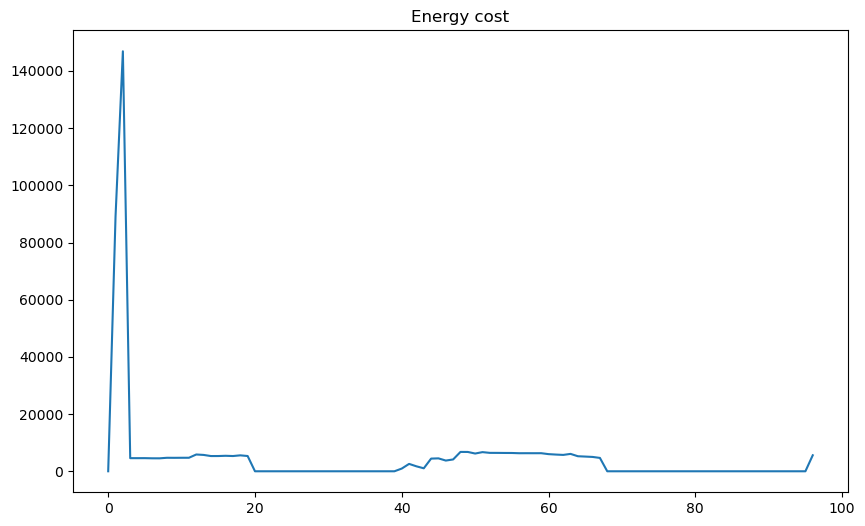

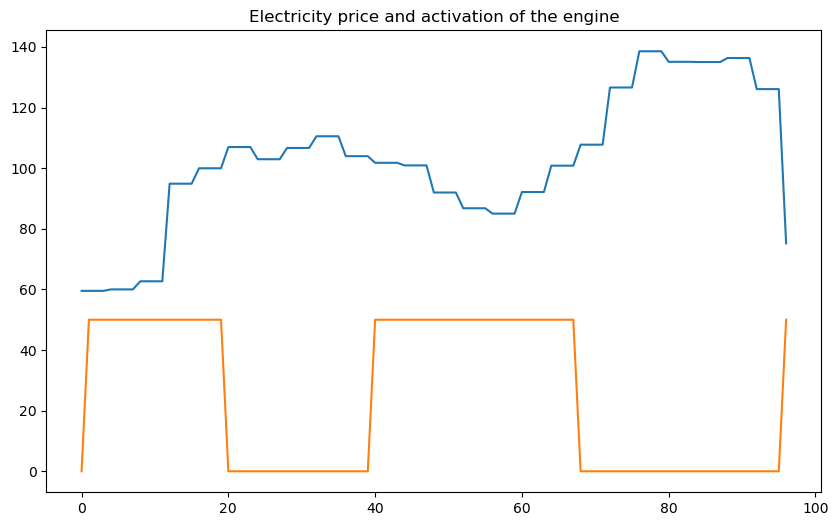

In [12]:
val=[]
total=0
on=[]
for i in price_q.index:
    value=0
    flag=0
    ind=df0[df0[0]==i].index#find the index of the load
    x=book1.iloc[ind][0]#find the load
    x = np.asarray(x, dtype='float64')
    
    p=price_q.loc[i][0]#find the electricity price for that quarter
    p = np.asarray(p, dtype='float64')
    if np.isnan(x*p)==False:
        value=x*p
        value=value.item()
        flag=1
    val.append(value)
    on.append(flag*50)
    total+=value
print("Total energy cost",total)
plt.plot(val)
plt.title("Energy cost")
plt.show()
plt.title("Electricity price and activation of the engine")
plt.plot(price_q)
plt.plot(on)


Total energy cost 393510.7625887


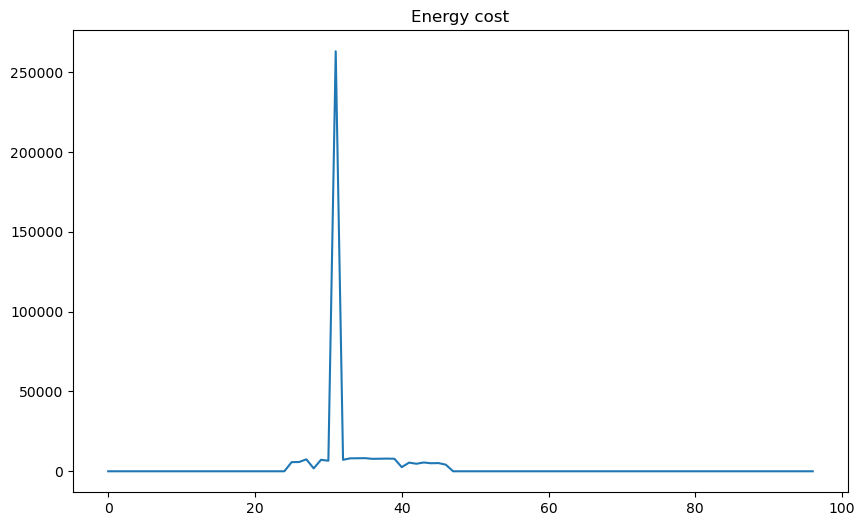

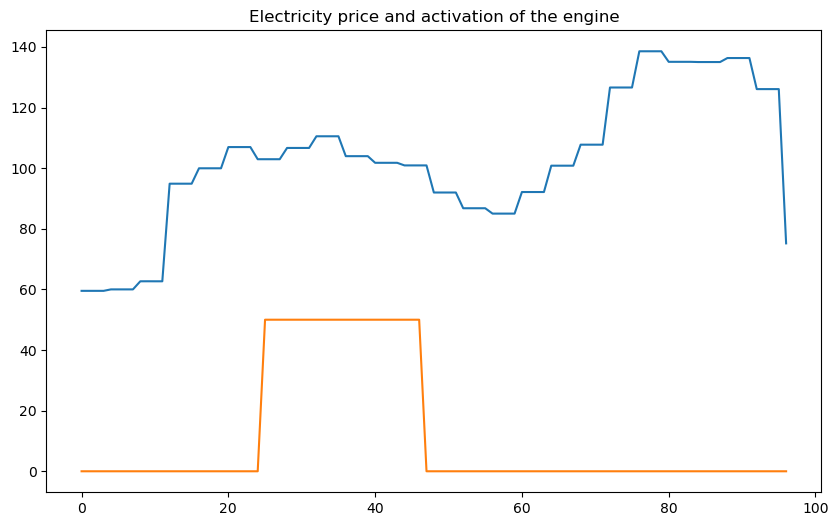

In [11]:
val=[]
total=0
on=[]
for i in price_q.index:
    value=0
    flag=0
    if i>24 and i<book1.index.max():
        x=book1.iloc[i][0]#find the load at after 6am
        x = np.asarray(x, dtype='float64')
    
        p=price_q.loc[i][0]#find the value for that quarter
        p = np.asarray(p, dtype='float64')
        value=x*p
        flag=1
    val.append(value)
    on.append(flag*50)
    total+=value

print("Total energy cost",total)
plt.plot(val)
plt.title("Energy cost")
plt.show()
plt.title("Electricity price and activation of the engine")
plt.plot(price_q)
plt.plot(on)
